In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Andronov-Hopf bifurcation
def andronov_hopf(x1, x2, a):
    dx1 = a*x1 - x2 - x1*(x1**2 + x2**2)
    dx2 = x1 + a*x2 - x2*(x1**2 + x2**2)
    return dx1, dx2

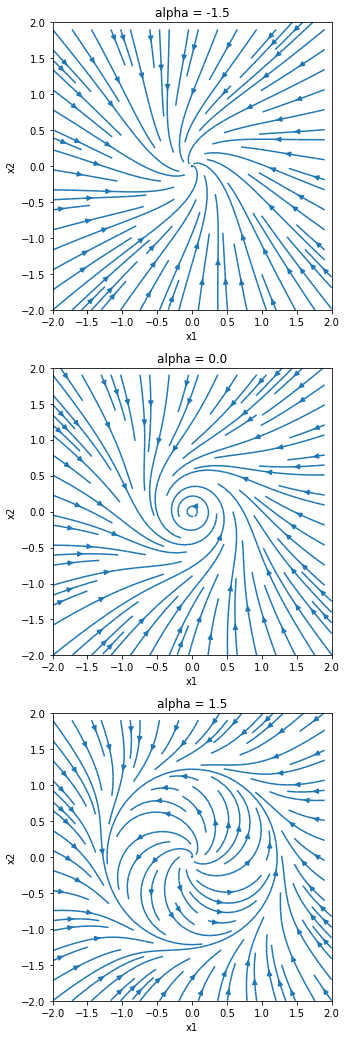

In [3]:
# 3.1
# Phase portraits
# Width, height and points along axes
w = 2
h = 2
n = 100

# x and y dimensions
x1_d = np.linspace(-w, w, n)
x2_d = np.linspace(-h, h, n)

# Alpha values
a_values = np.array([-1.5, 0., 1.5])

# Meshgrid
x1, x2 = np.meshgrid(x1_d, x2_d)

la = len(a_values)

# Figuresize
plt.figure(figsize=(5,5*la+3))

for i in range(la):
    a_val = a_values[i]
    
    splt = plt.subplot(la, 1, i+1)
    dx1, dx2 = andronov_hopf(x1, x2, a_val)
    splt.streamplot(x1, x2, dx1, dx2, density=1.)
    splt.set_title('alpha = ' + str(a_val))
    plt.xlabel('x1')
    plt.ylabel('x2')

plt.show()

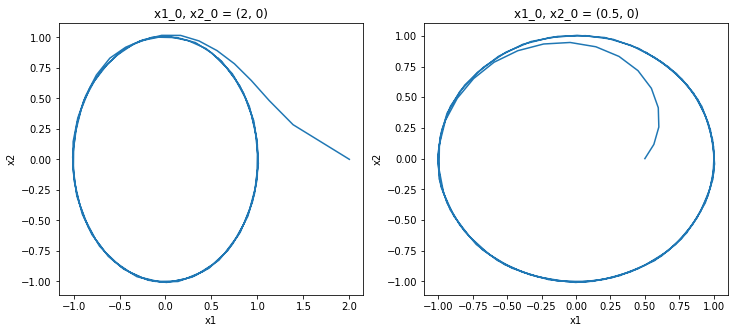

In [4]:
# 3.2
# Vectorized andronov hopf
def vec_andronov_hopf(t, x, a):
    x1 = x[0]
    x2 = x[1]
    return np.array(andronov_hopf(x1, x2, a))

# Numerical computation of orbits
alpha = 1.
x0_1 = np.array([2., 0.])
x0_2 = np.array([0.5, 0.])
n = 100
tspan = (0., 20.)
teval = np.linspace(tspan[0], tspan[1], n)


sol_1 = solve_ivp(lambda t, x: vec_andronov_hopf(t, x, alpha), tspan, x0_1, t_eval=teval)
sol_2 = solve_ivp(lambda t, x: vec_andronov_hopf(t, x, alpha), tspan, x0_2, t_eval=teval)


x1_1 = sol_1.y[0]
x2_1 = sol_1.y[1]

x1_2 = sol_2.y[0]
x2_2 = sol_2.y[1]


# Plotting
plt.figure(figsize=(12,5))

splt = plt.subplot(1, 2, 1)
splt.plot(x1_1, x2_1)
splt.set_title('x1_0, x2_0 = ' + str((2,0)))
plt.xlabel('x1')
plt.ylabel('x2')

splt = plt.subplot(1, 2, 2)
splt.plot(x1_2, x2_2)
splt.set_title('x1_0, x2_0 = ' + str((0.5,0)))
plt.xlabel('x1')
plt.ylabel('x2')

plt.show()

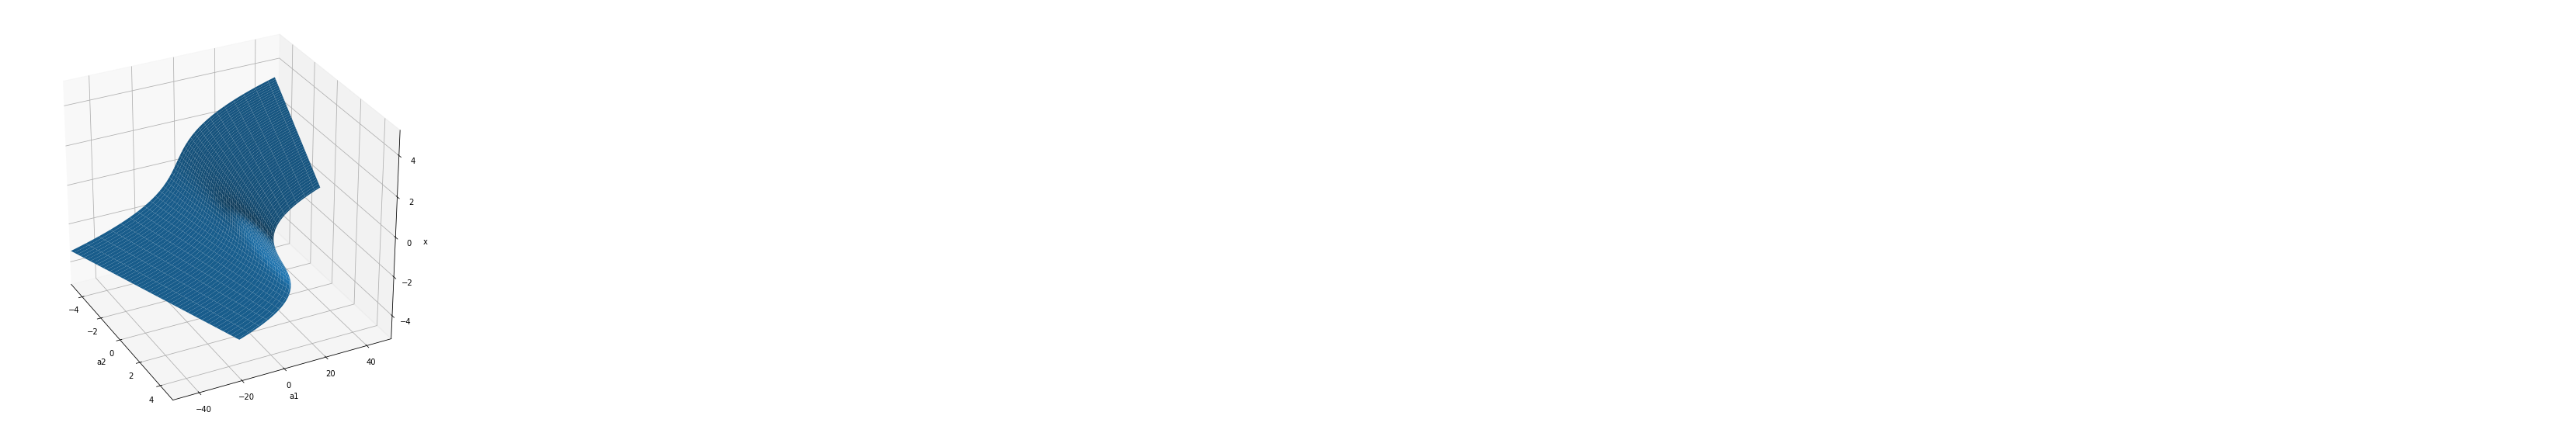

In [5]:
# Bifurcation surface
fig = plt.figure(figsize=(10.,10.))
ax = fig.add_subplot(111, projection='3d')
x_d  = np.arange(-3.3, 3.3, 0.1)
a2_d = np.arange(-5., 5., 0.1)

x, a2 = np.meshgrid(x_d, a2_d)
a1 = x**3 - a2*x

surf = ax.plot_surface(a2, a1, x)

ax.view_init(30, 333)
ax.set_xlim3d(-5, 5)
ax.set_ylim3d(-50, 50)
ax.set_zlim3d(-5, 5)
ax.set_xlabel('a2')
ax.set_ylabel('a1')
ax.set_zlabel('x')

plt.show()